In [56]:
import numpy as np
import sympy as sy
from ipywidgets import interactive
from sympy import init_session
import matplotlib.pyplot as plt

##################################################################
##    Important Notice
##    In CST txt file first remember to change ',' to '.' for number floating point 
##         then delete all ';' charachters in the txt file
####################################################

### In this code 1st we save electron collision energy for each of field emission sites separately
###    After collecting all emission electrons energy in separate files in the 2nd part we combine 
###    all of mentioned files and our code will count how many electrons with identical collisions 
###    energies exist and plot them. So final out put will be similar to scintillator out put.

######### After implementation of above mentioned changes open txt file 

f = open('iris1 right-20mm width.txt', 'r')
array01 = np.array(f.read().splitlines())
f.close()
print('\n',array01,'\n')

L1=len(array01)

x01=list()
i=0
while i<L1:
    x00=array01[i][0:15]
    x01.append(x00)
    i=i+1

############## looking at txt file we will find out that initial and collision energy of electron
#####               is extractable around '# Energy '.
x02=list()
x03=list()
i=0
i2=1

while i<L1-1:
    if x01[i]=='# Energy ':
        x02.append(i2)
        x02.append(x01[i-4])
        x02.append(x01[i])
        x02.append(x01[i+1])
        i2=i2+1
    i=i+1

L2=len(x02)
print('L2 is:  ', L2)
#### Now we do some arrangement to have electron number first, then electron initial energy and then 
####        electron collision energy. This will be repeated for all electrons.

i1=0
i2=0
while i1<L2-1:
    if x02[i1]=='# Energy ':
        x03.append(i2)
        a1=float(x02[i1+1])
        a2=float(x02[i1-1])
        x03.append(a1)
        x03.append(a2)
        i2=i2+1
            
    i1=i1+1

L3=len(x03)
print('L3 is:  ',L3)

### For checking x03 we can use on of following commands:

##x03

#for st in x03:
#    print(st)

############################################
##   As we only need electron collision energy so put them in x04 and then use sort() function
x04=list()
i1=0
i2=0
while i1<L3-1:
    x04.append(x03[2+i1])
    i1=i1+3

x04 = [int(x) for x in x04]
x04.sort()

print('electron max collision energy is:', max(x04))
L4=len(x04)
print('x04 length is:', len(x04))  

##### We can check x04
#for st in x04:
#    print(st)
    
##### Considering electron emission site select a proper name for saving collision energies 
###             File containing collision energies will be used later
with open('iris1-right.txt', 'w') as f:    
    for st in x04:
        print(st, file=f)

        
##### for graphical check we and in order to have better visualy graph we turn 1st 4 digits of 
###           collision energy to zero to increase number of collision energies with identical 
###           value. 

x05=list()
for tt1 in x04:
    tt1=10000*int(tt1/10000)
    x05.append(tt1)
    
#### Count identical energies    
p01=list()
p02=list()
i1=0
i2=0
while i1<L4-1:
    z01=x05.count(x05[i1])
    p01.append(z01)
    p02.append(x05[i1])
    i1=i1+1 
    
x05


 ['# Trajectories' '# Trajectory 0' '# Energy ' ... ' 2096111 ' ' 2120053 '
 ' 2131071 '] 

L2 is:   2496
L3 is:   1872
electron max collision energy is: 7291768
x04 length is: 624


[40000,
 70000,
 130000,
 150000,
 160000,
 180000,
 190000,
 250000,
 290000,
 350000,
 380000,
 420000,
 430000,
 440000,
 540000,
 540000,
 570000,
 590000,
 610000,
 660000,
 690000,
 690000,
 720000,
 720000,
 730000,
 760000,
 760000,
 760000,
 770000,
 770000,
 770000,
 770000,
 780000,
 780000,
 780000,
 780000,
 780000,
 790000,
 790000,
 800000,
 800000,
 850000,
 850000,
 870000,
 880000,
 880000,
 890000,
 900000,
 920000,
 920000,
 920000,
 930000,
 930000,
 940000,
 940000,
 940000,
 940000,
 960000,
 960000,
 1010000,
 1090000,
 1100000,
 1100000,
 1120000,
 1120000,
 1130000,
 1150000,
 1160000,
 1160000,
 1170000,
 1170000,
 1170000,
 1190000,
 1190000,
 1190000,
 1230000,
 1230000,
 1270000,
 1270000,
 1280000,
 1290000,
 1310000,
 1320000,
 1330000,
 1340000,
 1350000,
 1350000,
 1350000,
 1370000,
 1380000,
 1390000,
 1460000,
 1470000,
 1480000,
 1480000,
 1480000,
 1490000,
 1520000,
 1530000,
 1530000,
 1550000,
 1550000,
 1550000,
 1560000,
 1560000,
 1570000,
 

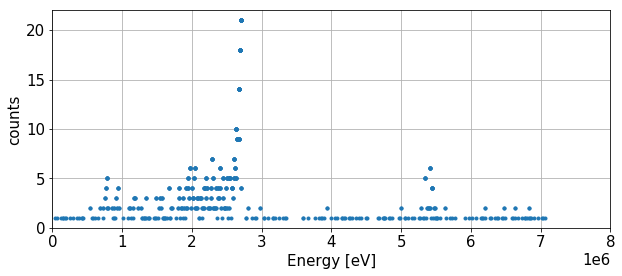

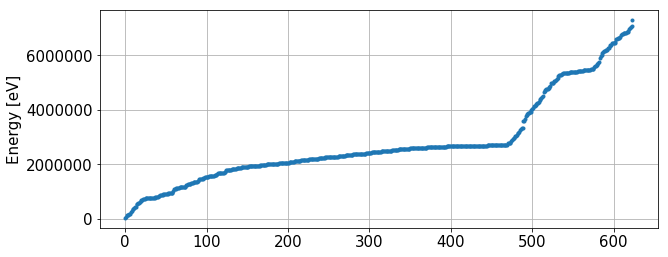

In [58]:
from pylab import rcParams
from matplotlib.pyplot import *
rcParams['figure.figsize'] = 10, 4
matplotlib.rcParams.update({'font.size': 15})

plt.plot(p02, p01, '.');
plt.xlim((0,8000000))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Energy [eV]')
plt.ylabel('counts')
plt.grid()

plt.figure()
plt.plot(x05, '.');
plt.ylabel('Energy [eV]')
plt.grid()

In [61]:
filenames = ['iris1-right.txt','iris2-left.txt','iris2-right.txt','iris3-left.txt','iris3-right.txt','iris4-left.txt']
with open('phase-20.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)
                
                
f = open('phase-20.txt', 'r')
fieldemission00 = np.array(f.read().splitlines())
f.close()

LL=len(fieldemission00)
print(LL)

fieldemission01 = [int(x) for x in fieldemission00]
fieldemission01.sort()


fieldemission02=list()
for tt1 in fieldemission01:
    tt1=10000*int(tt1/10000)
    fieldemission02.append(tt1)

    
xx01=list()
yy01=list()

i1=0
i2=0
while i1<LL-1:
    zz=fieldemission02.count(fieldemission02[i1])
    print(fieldemission02[i1], zz)
    yy01.append(zz)
    xx01.append(fieldemission02[i1])
    i1=i1+1  


3692
40000 1
70000 1
130000 1
150000 1
160000 1
180000 1
190000 1
250000 1
290000 1
350000 1
380000 1
420000 1
430000 1
440000 1
540000 2
540000 2
570000 1
590000 1
610000 1
660000 1
690000 2
690000 2
700000 2
700000 2
710000 1
720000 9
720000 9
720000 9
720000 9
720000 9
720000 9
720000 9
720000 9
720000 9
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
730000 32
740000 3
740000 3
740000 3
750000 9
750000 9
750000 9
750000 9
750000 9
750000 9
750000 9
750000 9
750000 9
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
760000 16
770000 21
770000 21
770000 21
770000 21
770000 21
770000 21
770000 21
770000 21
770000 21
770000 21
770

2000000 21
2000000 21
2000000 21
2000000 21
2000000 21
2000000 21
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2010000 18
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2020000 20
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2030000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2040000 21
2050000 29
2050000 29
2050000 29
2050000 29
2050000 29

2390000 28
2390000 28
2390000 28
2390000 28
2390000 28
2390000 28
2390000 28
2390000 28
2390000 28
2390000 28
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2400000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2410000 19
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2420000 22
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21
2430000 21

2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2800000 25
2810000 6
2810000 6
2810000 6
2810000 6
2810000 6
2810000 6
2820000 3
2820000 3
2820000 3
2830000 3
2830000 3
2830000 3
2840000 3
2840000 3
2840000 3
2850000 4
2850000 4
2850000 4
2850000 4
2860000 5
2860000 5
2860000 5
2860000 5
2860000 5
2870000 2
2870000 2
2880000 7
2880000 7
2880000 7
2880000 7
2880000 7
2880000 7
2880000 7
2890000 2
2890000 2
2900000 1
2910000 4
2910000 4
2910000 4
2910000 4
2920000 6
2920000 6
2920000 6
2920000 6
2920000 6
2920000 6
2930000 5
2930000 5
2930000 5
2930000 5
2930000 5
2940000 6
2940000 6
2940000 6
2940000 6
2940000 6
2940000 6
2950000 5
2950000 5
2950000 5
2950000 5
2950000 5
2960000 3
2960000 3
2960000 3
2970000 3
2970000 3
2970000 3
2980000 3
2980000 3
2980000 3
2990000 2
2990000 2
300000

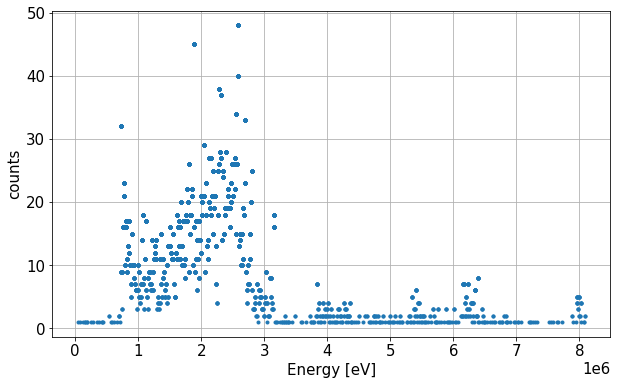

In [64]:
rcParams['figure.figsize'] = 10, 6

plt.plot(xx01, yy01, '.');
plt.xlabel('Energy [eV]')
plt.ylabel('counts')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.grid()     